<a href="https://colab.research.google.com/github/tonywangs/cs131-final-project/blob/main/131_alternative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import cv2 as cv
import os
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
! pip install torch torchvision matplotlib numpy
! pip install kaggle
from google.colab import drive
drive.mount('/content/drive')
! mkdir ~/.kaggle
! cp /root/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download frlemarchand/nfl-player-numbers

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat '/root/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/frlemarchand/nfl-player-numbers
License(s): CC0-1.0
nfl-player-numbers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
!zip -T nfl-player-numbers.zip

test of nfl-player-numbers.zip OK


In [18]:
! unzip nfl-player-numbers.zip -d nfl_data

Archive:  nfl-player-numbers.zip
replace nfl_data/train_player_numbers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace nfl_data/train_player_numbers/57583_000082_Endzone_100_H27.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace nfl_data/train_player_numbers/57583_000082_Endzone_100_H36.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace nfl_data/train_player_numbers/57583_000082_Endzone_100_H50.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace nfl_data/train_player_numbers/57583_000082_Endzone_100_H56.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace nfl_data/train_player_numbers/57583_000082_Endzone_100_H56.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace nfl_data/train_player_numbers/57583_000082_Endzone_100_H90.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace nfl_data/train_player_numbers/57583_000082_Endzone_100_H96.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace nfl_data/train_player_numbers/57583_000082_Endzone_100_H97.png?

In [19]:
print(os.path.abspath("nfl-player-numbers.zip"))

/content/nfl-player-numbers.zip


In [20]:
import zipfile

zip_file_path = '/content/nfl-player-numbers.zip'
extract_to_folder = '/content/nfl_data'  # Choose your desired extraction path

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_folder)

print(f"Files extracted to: {extract_to_folder}")

Files extracted to: /content/nfl_data


In [21]:
# from google.colab.patches import cv2_imshow

# cap = cv.VideoCapture('/content/extracted_bundesliga_data/DFL Bundesliga Data Shootout/train/A1606b0e6_0/A1606b0e6_0 (35).mp4')

# images =

# while(cap.isOpened()):
#   ret, frame = cap.read()


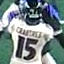

In [22]:
from google.colab.patches import cv2_imshow

image = cv.imread('/content/nfl_data/train_player_numbers/57583_000082_Endzone_100_V15.png')
cv2_imshow(image)

In [70]:
# ! pip install scipy
# import scipy

# def gaussian_kernel(size, sigma):
#   kernel = np.zeros((size, size))
#   k = size // 2

#   for i in range(size):
#         for j in range(size):
#             kernel[i,j] = np.exp(-((i-k)**2 + (j-k)**2)/(2*sigma**2)) / (2*np.pi*sigma**2)

#   kernel /= np.sum(kernel)
#   return kernel

# def gradient(img):
#   G = np.zeros(img.shape)
#   theta = np.zeros(img.shape)

#   k_x = [[-1,0,1],
#         [-2,0,2],
#         [-1,0,1]]

#   k_y = [[1,2,1],
#         [0,0,0],
#         [-1,-2,-1]]

#   x_partial = scipy.ndimage.convolve(img, k_x)
#   y_partial = scipy.ndimage.convolve(img, k_y)

#   G = np.sqrt(x_partial**2 + y_partial**2)
#   theta = np.arctan2(y_partial, x_partial) / (2*np.pi) * 360
#   theta = theta % 360

#   return G, theta

# def nms(G, theta):
#   H, W = G.shape
#   out = np.zeros((H, W))

#   theta = np.floor((theta + 22.5) / 45) * 45
#   theta = (theta % 360.0).astype(np.int32)

#   for i in range(H):
#       for j in range(W):
#           if theta[i,j] == 0 or theta[i,j] == 180:
#               before = G[i, max(j-1,0)]
#               after = G[i, min(j+1,W-1)]

#           elif theta[i,j] == 45 or theta[i,j] == (45+180):
#               if i-1 < 0 or j-1 < 0:
#                   before = 0
#               else:
#                   before = G[i-1, j-1]
#               if i+1 > H-1 or j+1 > W-1:
#                   after = 0
#               else:
#                   after = G[i+1, j+1]

#           elif theta[i,j] == 90 or theta[i,j] == (90+180):
#               before = G[max(i-1,0), j]
#               after = G[min(i+1,H-1), j]

#           else:
#               if i-1 < 0 or j+1 > W-1:
#                   before = 0
#               else:
#                   before = G[i-1, j+1]

#               if i+1 > H-1 or j-1 < 0:
#                   after = 0
#               else:
#                   after = G[i+1, j-1]

#           out[i,j] = G[i,j] if max(G[i,j], before, after) == G[i,j] else 0

#   return out

# def double_thresholding(img, high, low):
#     strong_edges = np.zeros(img.shape, dtype=bool)
#     weak_edges = np.zeros(img.shape, dtype=bool)

#     strong_edges = img > high
#     weak_edges = (img > low) * (img <= high)

#     return strong_edges, weak_edges

# def get_neighbors(y, x, H, W):
#     neighbors = []

#     for i in (y-1, y, y+1):
#         for j in (x-1, x, x+1):
#             if i >= 0 and i < H and j >= 0 and j < W:
#                 if (i == y and j == x):
#                     continue
#                 neighbors.append((i, j))

#     return neighbors

# def link_edges(strong_edges, weak_edges):
#     H, W = strong_edges.shape
#     indices = np.stack(np.nonzero(strong_edges)).T
#     edges = np.zeros((H, W), dtype=bool)

#     weak_edges = np.copy(weak_edges)
#     edges = np.copy(strong_edges)

#     for r, c in indices:
#         Q = []
#         Q.append((r, c))

#         while Q:
#             y, x = Q.pop(0)
#             for i, j in get_neighbors(y, x, H, W):
#                 if weak_edges[i, j] == True:
#                     weak_edges[i, j] = False
#                     edges[i, j] = True
#                     Q.append((i, j))

#     edges = cv.normalize(edges.astype(np.uint8), None, 0, 255, cv.NORM_MINMAX)


#     return edges

In [251]:
# Hysteresis Try
! pip install scipy
import scipy

def gaussian_kernel(size, sigma):
  kernel = np.zeros((size, size))
  k = size // 2

  for i in range(size):
        for j in range(size):
            kernel[i,j] = np.exp(-((i-k)**2 + (j-k)**2)/(2*sigma**2)) / (2*np.pi*sigma**2)

  kernel /= np.sum(kernel)
  return kernel

def gradient(img):
  G = np.zeros(img.shape)
  theta = np.zeros(img.shape)

  k_x = [[-1,0,1],
        [-2,0,2],
        [-1,0,1]]

  k_y = [[1,2,1],
        [0,0,0],
        [-1,-2,-1]]

  x_partial = scipy.ndimage.convolve(img, k_x)
  y_partial = scipy.ndimage.convolve(img, k_y)

  G = np.sqrt(x_partial**2 + y_partial**2)
  theta = np.arctan2(y_partial, x_partial) / (2*np.pi) * 360
  theta = theta % 360

  return G, theta


def nms(G, theta):
  H, W = G.shape
  out = np.zeros((H, W))

  theta = np.floor((theta + 22.5) / 45) * 45
  theta = (theta % 360.0).astype(np.int32)

  for i in range(H):
      for j in range(W):
          if theta[i,j] == 0 or theta[i,j] == 180:
              before = G[i, max(j-1,0)]
              after = G[i, min(j+1,W-1)]

          elif theta[i,j] == 45 or theta[i,j] == (45+180):
              if i-1 < 0 or j-1 < 0:
                  before = 0
              else:
                  before = G[i-1, j-1]
              if i+1 > H-1 or j+1 > W-1:
                  after = 0
              else:
                  after = G[i+1, j+1]

          elif theta[i,j] == 90 or theta[i,j] == (90+180):
              before = G[max(i-1,0), j]
              after = G[min(i+1,H-1), j]

          else:
              if i-1 < 0 or j+1 > W-1:
                  before = 0
              else:
                  before = G[i-1, j+1]

              if i+1 > H-1 or j-1 < 0:
                  after = 0
              else:
                  after = G[i+1, j-1]

          out[i,j] = G[i,j] if max(G[i,j], before, after) == G[i,j] else 0

  return out

def double_thresholding(img, high, low):
    strong_edges = np.zeros(img.shape, dtype=bool)
    weak_edges = np.zeros(img.shape, dtype=bool)

    strong_edges = img > high
    weak_edges = (img > low) * (img <= high)

    return strong_edges, weak_edges

def get_neighbors(y, x, H, W):
    neighbors = []

    for i in (y-1, y, y+1):
        for j in (x-1, x, x+1):
            if i >= 0 and i < H and j >= 0 and j < W:
                if (i == y and j == x):
                    continue
                neighbors.append((i, j))

    return neighbors

def link_edges(strong_edges, weak_edges):
    H, W = strong_edges.shape
    indices = np.stack(np.nonzero(strong_edges)).T
    edges = np.zeros((H, W), dtype=bool)

    weak_edges = np.copy(weak_edges)
    edges = np.copy(strong_edges)

    for r, c in indices:
        Q = []
        Q.append((r, c))

        while Q:
            y, x = Q.pop(0)
            for i, j in get_neighbors(y, x, H, W):
                if weak_edges[i, j] == True:
                    weak_edges[i, j] = False
                    edges[i, j] = True
                    Q.append((i, j))

    edges = cv.normalize(edges.astype(np.uint8), None, 0, 255, cv.NORM_MINMAX)


    return edges

def hysteresis_thresholding(gradient_magnitude, low_threshold, high_threshold):
    """
    Applies hysteresis thresholding to an edge-detected image.

    Parameters:
    - gradient_magnitude: Edge intensity image (e.g., from Sobel or Laplacian)
    - low_threshold: The lower threshold for weak edges
    - high_threshold: The upper threshold for strong edges

    Returns:
    - Final edge-detected binary image
    """
    # Create empty output image
    strong_edges = (gradient_magnitude >= high_threshold).astype(np.uint8) * 255
    weak_edges = ((gradient_magnitude >= low_threshold) & (gradient_magnitude < high_threshold)).astype(np.uint8) * 255

    # Define connectivity kernel (8-connected neighbors)
    kernel = np.array([[1, 1, 1],
                       [1, 1, 1],
                       [1, 1, 1]], dtype=np.uint8)

    # Iterate to connect weak edges to strong edges
    while True:
        # Dilate strong edges
        new_strong = cv.dilate(strong_edges, kernel)

        # Check which weak edges are now connected to strong edges
        new_weak_connected = np.bitwise_and(new_strong, weak_edges)

        # If no more weak edges are connected, stop
        if np.array_equal(new_weak_connected, strong_edges):
            break

        # Update strong edges with newly connected weak edges
        strong_edges = new_weak_connected

    return strong_edges

In [260]:
# Image pre-processing and edge detection
def canny(img, kernel_size=5, sigma=1.4, high=5, low=1):
  img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  img = cv.GaussianBlur(img, (5, 5), 1.5)
  print(f"Image: {img.shape}")

  kernel = gaussian_kernel(kernel_size, sigma)
  print(f"Kernel: {kernel.shape}")

  smoothed = scipy.ndimage.convolve(img, kernel)
  G, theta = gradient(smoothed)
  # non_max = nms(G, theta)
  # strong, weak = double_thresholding(non_max, high, low)
  # edge = link_edges(strong, weak)
  edge = hysteresis_thresholding(G, high, low)

  return edge

In [229]:
# # Image pre-processing and edge detection
# def canny(img, kernel_size=5, sigma=1.4, high=15, low=6):
#   img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#   img = cv.GaussianBlur(img, (5, 5), 1.5)
#   print(f"Image: {img.shape}")

#   kernel = gaussian_kernel(kernel_size, sigma)
#   print(f"Kernel: {kernel.shape}")

#   smoothed = scipy.ndimage.convolve(img, kernel)
#   G, theta = gradient(smoothed)
#   non_max = nms(G, theta)
#   strong, weak = double_thresholding(non_max, high, low)
#   edge = link_edges(strong, weak)

#   return edge

Image: (64, 64)
Kernel: (5, 5)


<Figure size 640x480 with 0 Axes>

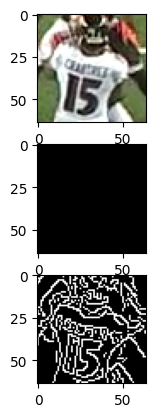

In [261]:
import matplotlib.pyplot as plt

canny_img = canny(image)

right = cv.Canny(image, 80, 200)

# Displaying the input and output image
plt.figure()
f, plots = plt.subplots(3, 1)
plots[0].imshow(image)
plots[1].imshow(canny_img).cmap='gray'
plots[2].imshow(right).cmap='gray'